In [1]:
import json
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt

from app.tools import *

In [2]:
%matplotlib notebook

In [3]:
consonants = "qwrtzpsdfghjklxcvbnm"
vowels = "euioay"

nbr_of_blobs = 25


while True:
    names_of_blobs = [
        "".join(
            [
                np.random.choice(l)
                for l in [list(consonants.upper()), list(vowels), list(consonants)]
            ]
        )
        for i in range(nbr_of_blobs)
    ]
    if len(names_of_blobs) == len(set(names_of_blobs)):
        break

root = names_of_blobs[0]
names_of_blobs[:5]

['Rif', 'Mib', 'Gap', 'Jum', 'Kuq']

In [4]:
g = nx.Graph()
g.add_node(root)

for blob in names_of_blobs[1:]:
    old_blob = np.random.choice(list(g.nodes))
    g.add_edge(old_blob, blob)

<IPython.core.display.Javascript object>


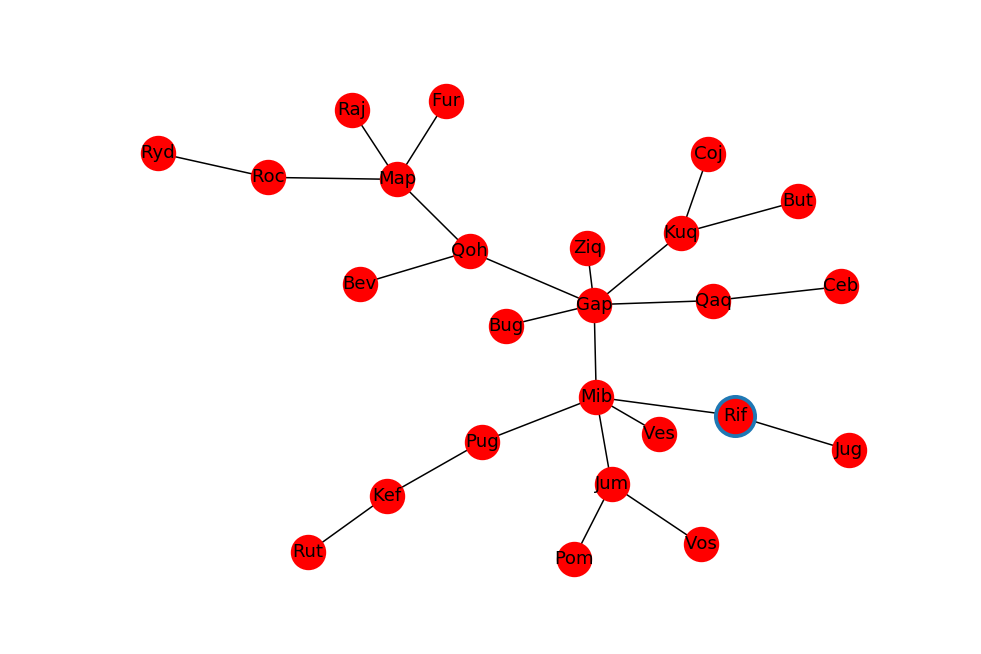

/home/pablo/Projects/WorkshopBlob/venv/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


In [5]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.axis('off')

pos = nx.kamada_kawai_layout(g)
nx.draw_networkx_nodes(g, ax=ax, pos=pos, nodelist=[root], color='blue', node_size=750)
nx.draw_networkx(g, ax=ax, pos=pos, node_color='red', node_size=500)

In [6]:
dict_neig = {blob: list(nx.neighbors(g, blob)) for blob in names_of_blobs}
dict_dist = {blob: nx.shortest_path_length(g, blob, root) for blob in names_of_blobs}

sequence = [
    [blob for blob in names_of_blobs if dict_dist[blob] == i]
    for i in range(max(dict_dist.values()) + 1)
]

with open('sequence.json', 'w') as outfile:
    json.dump(sequence, outfile)

with open('dict_neig.json', 'w') as outfile:
    json.dump(dict_neig, outfile)

In [7]:
sequence_of_groups = {'GRP{}'.format(i): len(grp) for i, grp in enumerate(sequence)}
sequence_of_groups

{'GRP0': 1, 'GRP1': 2, 'GRP2': 4, 'GRP3': 8, 'GRP4': 6, 'GRP5': 3, 'GRP6': 1}

In [8]:
init_state = wait_for_nodes_to_be_ready(nbr_of_blobs)

Waiting for nodes ...
All nodes are ready !


In [9]:
final_state = run_simulation(2, sequence_of_groups, init_state)

Simulation done !
